In [1]:
%pylab inline
from scipy.optimize import curve_fit


Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
def g(x,a,m,s):
    return a*exp(-(x-m)**2/(2*(s)**2))
def G(x, a, m, s,b,c,d):
    return a*exp(-(x-m)**2/(2*(s)**2))+b*x**2+c*x+d #modified gaussian distribution

def C(y,z):
    return sum((y-z)**2/(z))
def L(x,m,b):
    return m*x+b
def D(x,a,b):
    return a*e**(-b*x)


Populating the interactive namespace from numpy and matplotlib


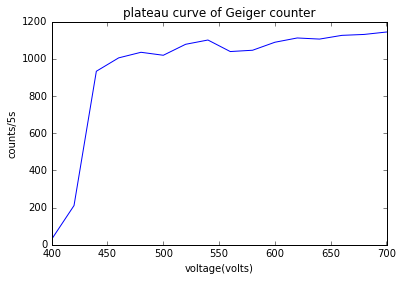

In [3]:
x=array([400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700])
y=array([30,211,933,1005,1035,1019,1078,1101,1039,1046,1089,1112,1106,1126,1131,1144])
plt.plot(x,y)
plt.ylabel('counts/5s')
plt.xlabel('voltage(volts)')
plt.title('plateau curve of Geiger counter')


1896.52568334 +/- 10.9879107853
the decay constant is: 0.01243 +/- 0.00011
the chisquare is: 19.0166465691
the half life is: 55.76 +/- 0.51


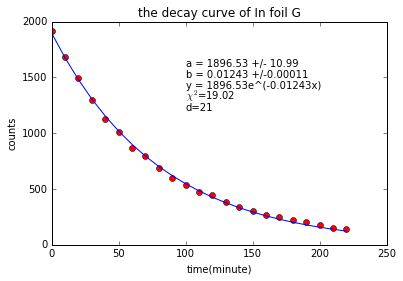

In [4]:
x=array([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220])
y=array([1917,1683,1491,1300,1128,1013,870,792,686,596,535,472,448,386,340,304,271,249,219,200,175,153,146])
plt.plot(x,y,'ro')
para, unc = curve_fit(D, x, y, p0=[1887.93,0.01225],maxfev=1000000000)
z=array(D(x, *para))
plt.plot(x, z, 'b-', label='fit')
plt.ylabel('counts')
plt.xlabel('time(minute)')
plt.title('the decay curve of In foil G')
print para[0],'+/-',sqrt(diag((unc)))[0]
print'the decay constant is:',round(para[1],5),'+/-',round(sqrt(diag((unc)))[1],5)
lb=round(para[1],5)
chi=C(y,z)
l= len(x)-2
print 'the chisquare is:', sum(chi)
print 'the half life is:',round(log(2)/lb,2),'+/-',round(log(2)/lb*sqrt(diag((unc)))[1]/para[1],2)
plt.text(100, 1600, 'a = %s +/- %s' % (round(para[0],2), round(sqrt(diag(unc))[0],2)))
plt.text(100, 1500, 'b = %s +/-%s' % (round(para[1],5), round(sqrt(diag(unc))[1],5)))
plt.text(100, 1400, 'y = %se^(-%sx)' % (round(para[0],2), round(para[1],5)))
plt.text(100,1300,r'$\chi^2$=%s' %round(sum(chi),2))
plt.text(100,1200,'d=%s' %(l))

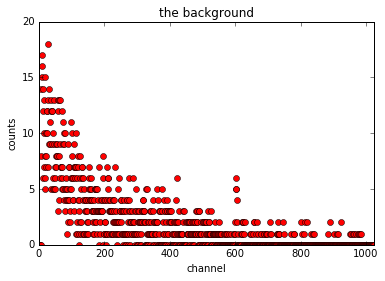

In [5]:
arr=genfromtxt("background.txt")
arr=arr.astype(int)
x=arr[:,0]
y=arr[:,1]
plt.plot(x,y,'ro' )
plt.xlabel('channel')
plt.ylabel('counts')
plt.axis([0,1024,0,20])
plt.title('the background')

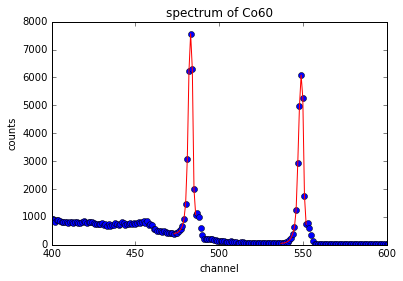

In [6]:
arr=genfromtxt("Co60N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x, y, 'bo')
plt.title('spectrum of Co60')
plt.xlabel('channel')
plt.ylabel('counts')
plt.axis([400,600,0,8000])
arr=genfromtxt("Co60 peak1 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]


plt.plot(x, y, 'r-') 

arr=genfromtxt("Co60 peak2 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]

plt.plot(x,y, 'r-') 
plt.title('spectrum of Co60')
plt.xlabel('channel')
plt.ylabel('counts')



total channel number is: 14
the mean value is: 482
the standard deviation is: 2.44948974278
the highest observation: 7564
the expectation value is: 482.95 +/- 0.07
standard deviatition of gaussain is: 1.3 +/- 0.09
chisquare is : 376.426958307
-9.23444499936
the gaussian expectation value is: 482.9 +/- 0.09
gaussian standard deviatition of gaussain is: 1.47 +/- 0.09
the gaussian chisquare is : 1.62385410667e+11


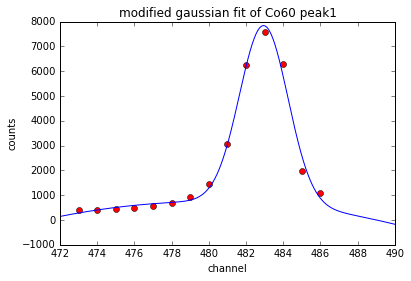

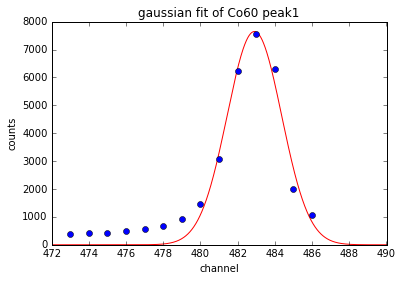

In [7]:
arr=genfromtxt("Co60 peak1 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)

mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,1,2,-10780],maxfev=1000000000)
z=array(G(x, *para))
plt.plot(x,y,'ro')
x_1=linspace(472,490,1000)
Z=array(G(x_1, *para))
plt.plot(x_1, Z, 'b-', label='fit') 
plt.title('modified gaussian fit of Co60 peak1')
plt.xlabel('channel')
plt.ylabel('counts')
dCo1=len(x)
chiCo1=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
Co1=round(para[1],2)

Co1u=round(sqrt(diag(unc))[1],2)

print 'chisquare is :',chiCo1
print para[3]



figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
Z=array(g(x_1, *para))
plt.plot(x_1, Z, 'r-', label='fit') 

plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Co60 peak1')
chigCo1=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
print 'the gaussian chisquare is :',chigCo1



total channel number is: 16
the mean value is: 548
the standard deviation is: 2.0
the highest observation: 6085
the expectation value is: 548.95 +/- 0.08
standard deviatition of gaussain is: 1.48 +/- 0.11
chisquare is : 326.222130925
-7.40886651227
the gaussian expectation value is: 548.88 +/- 0.06
gaussian standard deviatition of gaussain is: 1.52 +/- 0.06
the gaussian chisquare is : 6.41559501491e+12


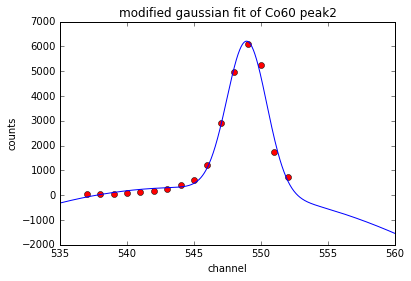

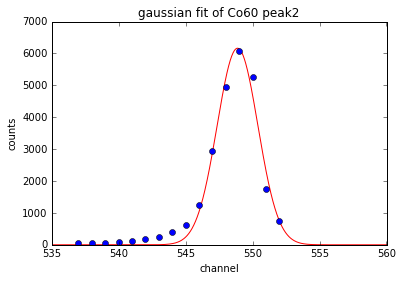

In [8]:
arr=genfromtxt("Co60 peak2 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)
mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,1,2,200],maxfev=10000000)
z=array(G(x, *para))
x_1=linspace(535,560,1000)
Z=array(G(x_1, *para))
plt.plot(x,y,'ro')
plt.plot(x_1, Z, 'b-', label='fit') 
plt.title('modified gaussian fit of Co60 peak2')
plt.xlabel('channel')
plt.ylabel('counts')
dCo2=len(x)
chiCo2=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
print 'chisquare is :',chiCo2
print para[3]



Co2=round(para[1],2)

Co2u=round(sqrt(diag(unc))[1],2)

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
x_1=linspace(535,560,1000)
Z=array(g(x_1, *para))
plt.plot(x_1, Z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Co60 peak2')
chigCo2=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
print 'the gaussian chisquare is :',chigCo2
Cog2=round(para[1],2)

Cog2u=round(sqrt(diag(unc))[1],2)

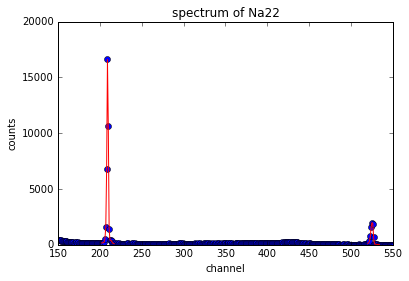

In [9]:
arr=genfromtxt("Na22N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x, y, 'bo')
plt.title('spectrum of Na22')
plt.xlabel('channel')
plt.ylabel('counts')
plt.axis([150,550,0,20000])
arr=genfromtxt("na22 peak1 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]



plt.plot(x, y, 'r-', label='fit')

arr=genfromtxt("na22 peak2 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]



plt.plot(x,y, 'r-', label='fit')

total channel number is: 16
the mean value is: 209
the standard deviation is: 1.41421356237
the highest observation: 16607
the expectation value is: 209.16 +/- 0.02
standard deviatition of gaussain is: 0.84 +/- 0.02
chisquare is : 1651.20639712
-7.16342002769
the gaussian expectation value is: 209.16 +/- 0.02
gaussian standard deviatition of gaussain is: 0.87 +/- 0.02
the gaussian chisquare is : 2.69326443052e+17


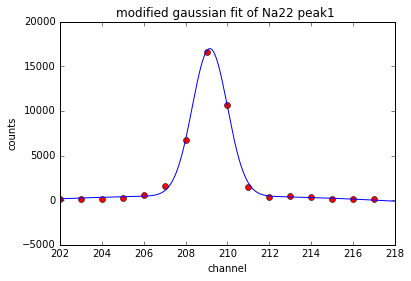

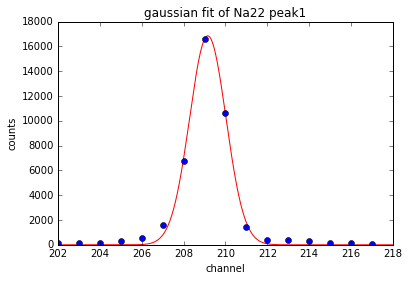

In [10]:
arr=genfromtxt("na22 peak1 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)
mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,1,2,-367931.35],maxfev=100000000)
z=array(G(x, *para))
plt.plot(x,y,'ro')
x_1=linspace(202,218,10000)
Z=array(G(x_1, *para))

plt.plot(x_1, Z, 'b-', label='fit') 
plt.title('modified gaussian fit of Na22 peak1 ')
plt.xlabel('channel')
plt.ylabel('counts')
dNa1=len(x)
chiNa1=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
print 'chisquare is :',chiNa1
print para[3]


Na1=round(para[1],2)

Na1u=round(sqrt(diag(unc))[1],2)

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
x_1=linspace(202,218,10000)
Z=array(g(x_1, *para))
plt.plot(x_1, Z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Na22 peak1')
chigNa1=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
print 'the gaussian chisquare is :',chigNa1


total channel number is: 15
the mean value is: 524
the standard deviation is: 1.73205080757
the highest observation: 1992
the expectation value is: 525.1 +/- 0.07
standard deviatition of gaussain is: 1.34 +/- 0.09
chisquare is : 1525.3729844
1.76891831295
the gaussian expectation value is: 525.05 +/- 0.07
gaussian standard deviatition of gaussain is: 1.4 +/- 0.07
the gaussian chisquare is : 48209647.33


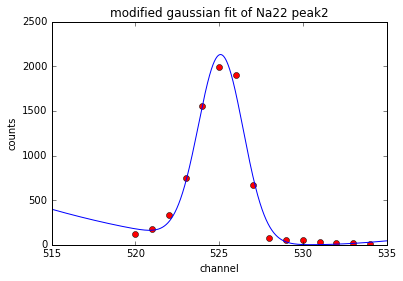

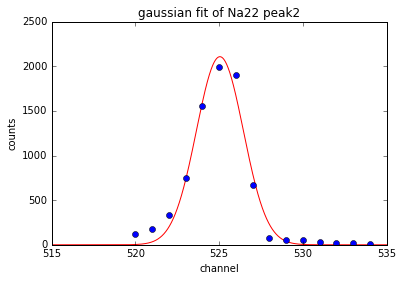

In [11]:
arr=genfromtxt("na22 peak2 N.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)
mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,1,2,496929.4],maxfev=100000000)
z=array(G(x, *para))
x_1=linspace(515,535,10000)
Z=array(G(x_1, *para))
plt.plot(x,y,'ro')
plt.plot(x_1, Z, 'b-', label='fit') 
plt.title('modified gaussian fit of Na22 peak2')
plt.xlabel('channel')
plt.ylabel('counts')
dNa2=len(x)
chiNa2=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
print 'chisquare is :',chiNa2
print para[3]

Na2=round(para[1],2)

Na2u=round(sqrt(diag(unc))[1],2)

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
x_1=linspace(515,535,10000)
Z=array(g(x_1, *para))
plt.plot(x_1, Z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Na22 peak2')
chigNa2=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc))[2],2)
print 'the gaussian chisquare is :',chigNa2
Nag2=round(para[1],2)

Nag2u=round(sqrt(diag(unc))[1],2)

the peak channel numbers are: [ 209.16  482.95  525.1   548.95]
the uncertainty of the peak channel numbers are: [ 0.02  0.07  0.07  0.08]
[  511.01  1173.24  1274.53  1332.5 ]
the chi-square is: 7.4
the slope is: 0.413656807764 +/- 0.000191449056256
the intersect is: -2.23929655369 +/- 0.214850191522
the expectation value of channel number is: [ 209.14  483.08  524.98  548.96]
the expected peak channel of Cs137 is : 272.0
degree of freedoms: [ 8 10 10  9]
chisquare: [  376.427   326.222  1651.206  1525.373]
[ 255.505  586.62   637.265  666.25 ]
[ 103.45208611  240.42006002  261.36970905  273.35955162]
the resolution rate are: [ 0.2024463   0.20491976  0.20507145  0.20514788]
the expectation value of gaussian fit are: [  1.62385411e+11   6.41559501e+12   2.69326443e+17   4.82096473e+07]


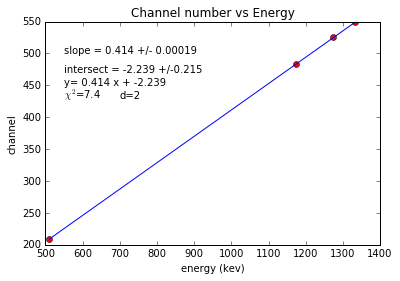

In [12]:
y=array([Na1,Co1,Na2,Co2])
s=array([ Na1u,Co1u,Na2u,Co2u])
print 'the peak channel numbers are:',y
print 'the uncertainty of the peak channel numbers are:',s
x=array([511.01,1173.24,1274.53,1332.50])
print x
para, unc = curve_fit(L,x,y,p0=[ 0.287, 8.21],maxfev=100000000)           
Z=array(L(x,*para))
plt.plot(x,y,'ro')
plt.plot(x,Z, 'b-', label='fit')
chigs=(around(Z,2)-y)**2/s**2
print 'the chi-square is:',round(sum(chigs),2)
plt.text(550, 500, 'slope = %s +/- %s' % (round(para[0],3), round(sqrt(diag(unc))[0],5)))
plt.text(550, 470, 'intersect = %s +/-%s' % (round(para[1],3), round(sqrt(diag(unc))[1],3)))
plt.text(550,450,'y= %s x + %s' % (round(para[0],3),round(para[1],3)))
plt.text(550,430,r'$\chi^2$=%s' %round(sum(chigs),2))
plt.text(700,430,'d=2')
plt.ylabel('channel')
plt.xlabel('energy (kev)')
plt.title('Channel number vs Energy')


print 'the slope is:',para[0],'+/-',sqrt(diag(unc))[0]
print 'the intersect is:',para[1],'+/-',sqrt(diag(unc))[1]

print 'the expectation value of channel number is:',around(Z,2)

C=L(662,*para)
print 'the expected peak channel of Cs137 is :',round(C)
D=array([dCo1,dCo2,dNa1,dNa2])-6
Chi=array([chiCo1,chiCo2,chiNa1,chiNa2])
print 'degree of freedoms:',D 
print 'chisquare:',around(Chi,3)
v=x/2
print v
H=L(v,*para)
print H
print 'the resolution rate are:',H/x
mg=array([chigCo1,chigCo2,chigNa1,chigNa2])
print 'the expectation value of gaussian fit are:',mg

the peak channel numbers are: [ 208.13  482.04  523.82  547.95]
the uncertainty of the peak channel numbers are: [ 0.67  0.72  1.28  0.65]
the chi-square is: 0.01
the slope is: 0.41359 +/- 0.00012
the intersect is: -3.22 +/- 0.14
the expectation value of channel number is: [ 208.13  482.02  523.91  547.89]
the expected peak channel of Cs137 is : 271.0


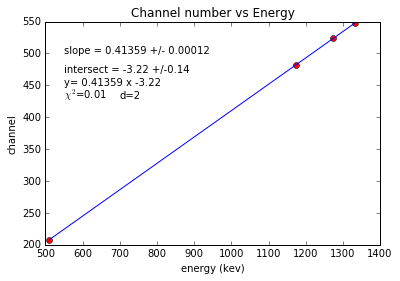

In [13]:
y=array([208.13,482.04,523.82,547.95])
s=array([0.67,0.72,1.28,0.65])
print 'the peak channel numbers are:',y
print 'the uncertainty of the peak channel numbers are:',s
x=array([511.01,1173.24,1274.53,1332.50])
para, unc = curve_fit(L,x,y,p0=[ 0.287, 8.21],maxfev=100000000)           
Z=array(L(x,*para))
plt.plot(x,y,'ro')
plt.plot(x,Z, 'b-', label='fit')
chigs=(around(Z,2)-y)**2/s**2
print 'the chi-square is:',round(sum(chigs),2)
plt.text(550, 500, 'slope = %s +/- %s' % (round(para[0],5), round(sqrt(diag(unc))[0],5)))
plt.text(550, 470, 'intersect = %s +/-%s' % (round(para[1],2), round(sqrt(diag(unc))[1],2)))
plt.text(550,450,'y= %s x %s' % (round(para[0],5),round(para[1],2)))
plt.text(550,430,r'$\chi^2$=%s' %round(sum(chigs),2))
plt.text(700,430,'d=2')
plt.ylabel('channel')
plt.xlabel('energy (kev)')
plt.title('Channel number vs Energy')

print 'the slope is:', round(para[0],5),'+/-',round(sqrt(diag(unc))[0],5)
print 'the intersect is:',round(para[1],2),'+/-',round(sqrt(diag(unc))[1],2)

print 'the expectation value of channel number is:',around(Z,2)

C=L(662,*para)
print 'the expected peak channel of Cs137 is :',round(C)

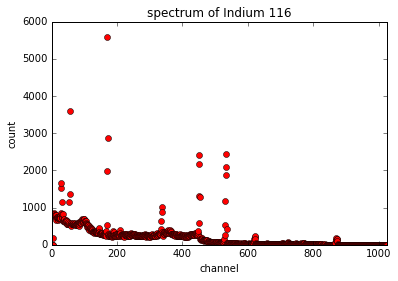

In [14]:
arr=genfromtxt("In116.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x,y,'ro')
plt.axis([0,1024,0,6000])
plt.title('spectrum of Indium 116')
plt.xlabel('channel')
plt.ylabel('count')

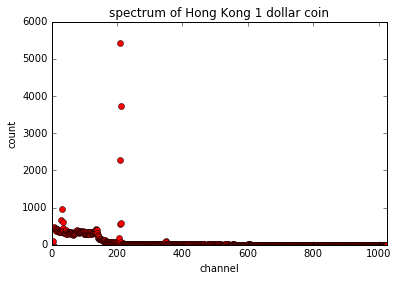

In [15]:
arr=genfromtxt("1dollar.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x,y,'ro')
plt.axis([0,1024,0,6000])
plt.title('spectrum of Hong Kong 1 dollar coin')
plt.xlabel('channel')
plt.ylabel('count')

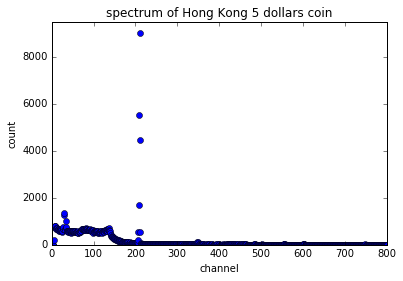

In [17]:
arr=genfromtxt("5dollar.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x,y,'bo')
plt.axis([0,800,0,9500])
plt.title('spectrum of Hong Kong 5 dollars coin')
plt.xlabel('channel')
plt.ylabel('count')